In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import july
from july.utils import date_range
import calplot

In [2]:
#read the data
import pandas as pd
df = pd.read_csv('sales_data_sample.csv', sep=",", encoding='Latin-1')
df.shape

(2823, 25)

In [3]:
#change the type of data
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
#Set orderdate as index
df.set_index('ORDERDATE', inplace = True)

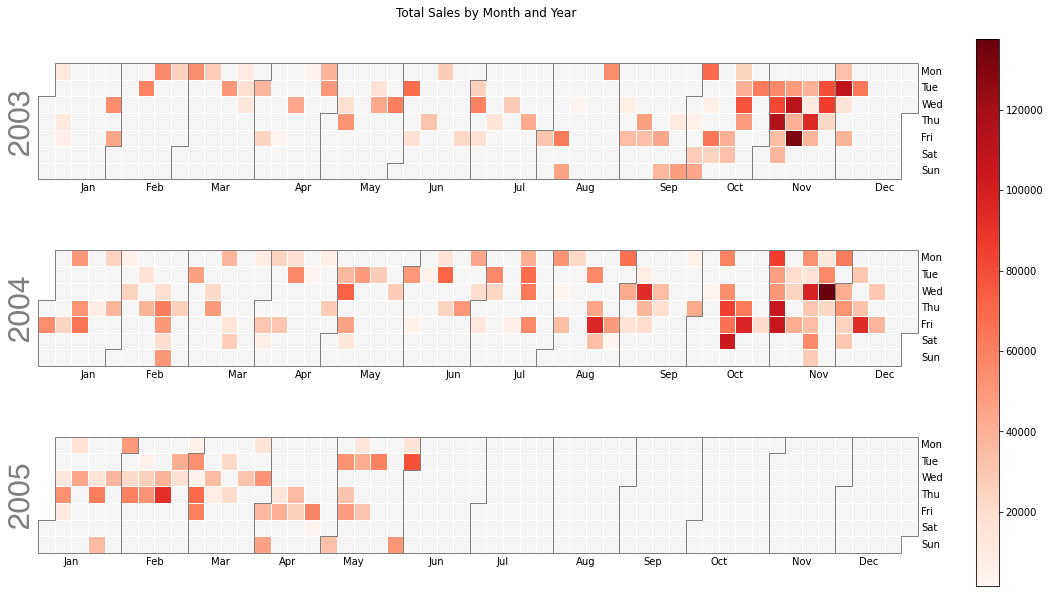

In [4]:
pl1 = calplot.calplot(data = df['SALES'],how = 'sum', cmap = 'Reds', figsize = (16, 8), suptitle = "Total Sales by Month and Year")

In [5]:
products = set(list(df['PRODUCTLINE']))

In [6]:
def draw_calplot(prod):
   data_subset = df[df['PRODUCTLINE'] == prod]
   plt = calplot.calplot(data = data_subset['SALES'], how = 'sum', figsize = (16,8), suptitle = 'Total Sales for teh Product '+prod) 

In [7]:
x = interact(draw_calplot, prod = products) 

interactive(children=(Dropdown(description='prod', options=('Motorcycles', 'Ships', 'Planes', 'Classic Cars', …

<AxesSubplot:title={'center':'Total Sales'}>

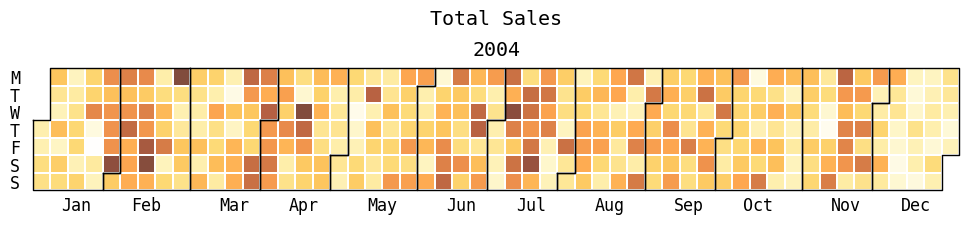

In [8]:
dates = date_range("2004-01-01", "2004-12-31")
july.heatmap( dates, data =df['SALES'], title='Total Sales', cmap="golden", month_grid=True, horizontal = True)

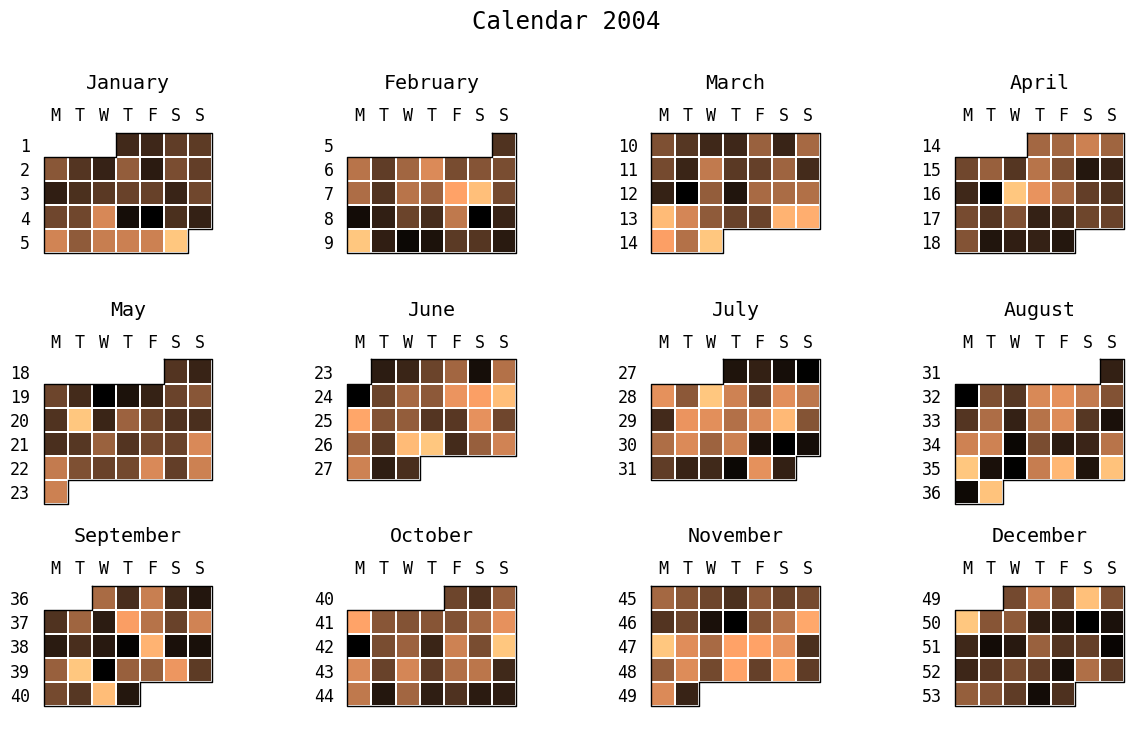

In [9]:
july.calendar_plot(dates, df['SALES'], cmap = 'copper');

In [78]:
import json
  
# Opening JSON file
f = open('response_1653133305885.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)

In [79]:
print(data['data'][0])

{'tdescription': 'free', 'tmetadata': {}, 'tname': 'free', 'ttype': 'Instantaneous', 'tunit': '', 'mperiod': 1, 'mtransactiontime': '2020-12-07 10:00:32.295+0000', 'mvalidtime': '2022-05-21 07:59:47.000+0000', 'mvalue': 0, 'sactive': True, 'savailable': True, 'scode': '001bc506701005d5', 'scoordinate': {'x': 11.345608, 'y': 46.495061, 'srid': 4326}, 'smetadata': {'id2': 'C-S9', 'group': 'area viale Druso', 'municipality': 'Bolzano - Bozen'}, 'sname': 'incrocio viale Venezia - viale Druso', 'sorigin': 'AXIANS', 'stype': 'ParkingSensor'}


In [80]:
import random

list_x = []
list_y = []
list_sname = []
list_time = []
list_valid_time = []
list_scode = []
list_description = []
list_sactive = []
list_random_number = []

for el in data['data']:
    list_x.append(el['scoordinate']['x'])
    list_y.append(el['scoordinate']['y'])
    list_sname.append(el['sname'])
    list_time.append(el['mtransactiontime'])
    list_valid_time.append(el['mvalidtime'])
    list_scode.append(el['scode'])
    list_description.append(el['tdescription'])
    list_sactive.append(el['sactive'])
    list_random_number.append(random.randint(0,10))

In [86]:
df = pd.DataFrame(list(zip(list_sname, list_x, list_y, list_time, list_valid_time, list_scode, list_description, list_sactive, list_random_number)),
               columns =['name', 'x', 'y', 'time', 'valid_time', 'scode', 'description', 'active', 'random'])

In [87]:
df['time'] = pd.to_datetime(df['time'])
df['valid_time'] = pd.to_datetime(df['valid_time'])

In [88]:
df.head()

,name,x,y,time,valid_time,scode,description,active,random
0,incrocio viale Venezia - viale Druso,11.345608,46.495061,2020-12-07 10:00:32.295000+00:00,2022-05-21 07:59:47+00:00,001bc506701005d5,free,True,0
1,Piazza Adriano 1,11.339989,46.494825,2020-12-07 10:00:53.547000+00:00,2022-05-21 09:53:26+00:00,001bc506701005c2,free,True,7
2,incrocio via Firenze - viale Druso,11.343347,46.494292,2020-12-07 10:01:20.449000+00:00,2022-05-21 07:51:04+00:00,001bc506701005cd,free,True,8
3,Via A. Rosmini 22-26,11.348042,46.498231,2020-12-07 10:01:48.617000+00:00,2021-12-01 13:08:04+00:00,001bc506701128e3,free,True,0
4,piazzetta Mazzoni 1,11.347067,46.495003,2020-12-07 10:02:06.842000+00:00,2022-05-21 10:48:43+00:00,001bc50670100544,free,True,0


/Users/yustinaivanova/PycharmProjects/hack22/venv/lib/python3.7/site-packages/calplot/calplot.py:195: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  for i in monthticks])


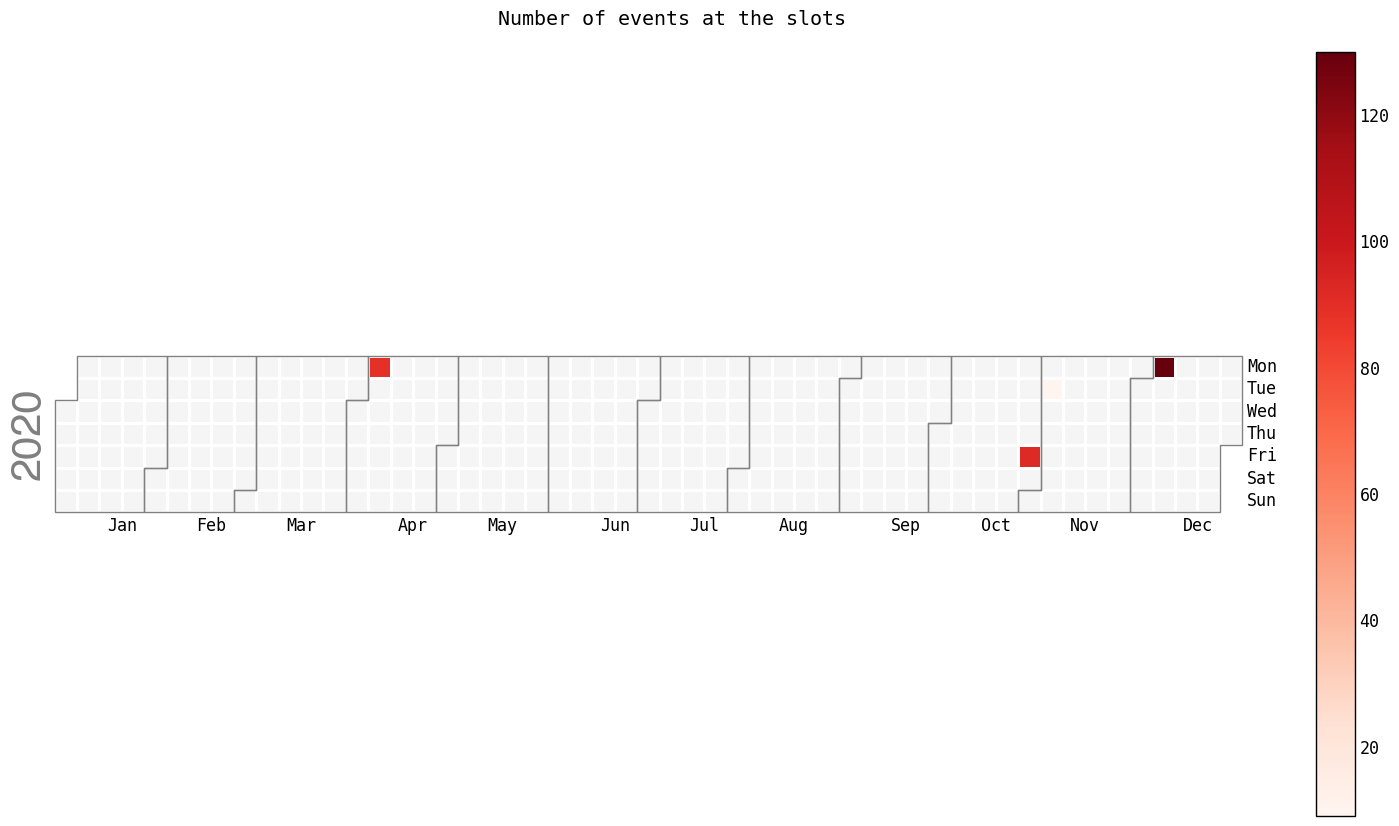

In [89]:
#Set orderdate as index
df.set_index('time', inplace = True)
pl1 = calplot.calplot(data = df['random'],how = 'sum', cmap = 'Reds', figsize = (16, 8), suptitle = "Number of events at the slots")

In [90]:
products = set(list(df['scode']))
def draw_calplot(prod):
    data_subset = df[df['scode'] == prod]
    plt = calplot.calplot(data = data_subset['random'], how = 'sum', figsize = (16,8), suptitle = 'Total '+prod) 

In [91]:
x = interact(draw_calplot, prod = products) 

interactive(children=(Dropdown(description='prod', options=('001bc50670100519', '001bc50670100556', '001bc5067…

In [92]:
# Opening JSON file
f = open('response_1653134220170.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)

In [93]:
data['data'][0]

{'evcategory': 'A22:BrennerLEC_BrennerLec B3 100 T3 (km 138-167)',
 'evend': '2019-01-20 18:00:00.000+0000',
 'evmetadata': {'id': 372146,
  'idcorsia': 'Intera carreggiata',
  'metro_fine': 138000,
  'iddirezione': 'Sud',
  'idtipoevento': 24,
  'metro_inizio': 168000,
  'fascia_oraria': False,
  'idsottotipoevento': 181},
 'evname': '372146',
 'evorigin': 'A22',
 'evseriesuuid': 'f4f4a18d-ffb8-5338-a252-453530984589',
 'evstart': '2019-01-20 08:00:00.000+0000',
 'evtransactiontime': '2022-02-08 17:33:43.587+0000',
 'evuuid': 'd9424b4e-6c73-5c58-ab8a-5423feb1b631',
 'evlgeometry': {'crs': {'type': 'name', 'properties': {'name': 'EPSG:4326'}},
  'bbox': [11.00300422, 45.8336233, 11.10997887, 46.06492389],
  'type': 'MultiPoint',
  'coordinates': [[11.10997887, 46.06492389], [11.00300422, 45.8336233]]}}

In [106]:
import random

list_evcategory = []
list_evstart = []
list_evtransactiontime = []
list_event = []

for el in data['data']:
    list_evcategory.append(el['evcategory'])
    list_evstart.append(el['evstart'])
    list_evtransactiontime.append(el['evtransactiontime'])
    list_event.append(1)

In [107]:
df = pd.DataFrame(list(zip(list_evcategory, list_evstart, list_evtransactiontime, list_event)),
               columns =['evcategory', 'evstart', 'evtransactiontime', 'event'])

In [108]:
df['evstart'] = pd.to_datetime(df['evstart'])
df['evtransactiontime'] = pd.to_datetime(df['evtransactiontime'])

In [109]:
df['evcategory'].unique()

array(['A22:BrennerLEC_BrennerLec B3 100 T3 (km 138-167)',
       'A22:BrennerLEC_BrennerLec B3 110 T3 (km 138-167)',
       'A22:BrennerLEC_BrennerLec B3 90 T3 (km 138-167)',
       'A22:BrennerLEC_BrennerLec B3 II 100 T1 (km 77-100)',
       'A22:BrennerLEC_BrennerLec B3 II 100 T2 (km 100-138)',
       'A22:BrennerLEC_BrennerLec B3 II 110 T1 (km 77-100)',
       'A22:BrennerLEC_BrennerLec B3 II 110 T2 (km 100-138)',
       'A22:BrennerLEC_BrennerLec B3 II 90 T1 (km 77-100)',
       'A22:BrennerLEC_BrennerLec B3 II 90 T2 (km 100-138)',
       'A22:BrennerLEC_BrennerLec B3Nord 100 T1 (km 121-85)',
       'A22:BrennerLEC_BrennerLec B3Nord 100 T2 (km 142-121)',
       'A22:BrennerLEC_BrennerLec B3Nord 110 T1 (km 121-85)',
       'A22:BrennerLEC_BrennerLec B3Nord 110 T2 (km 142-121)',
       'A22:BrennerLEC_BrennerLec B4 (BZ-SM)',
       'A22:BrennerLEC_BrennerLec B4 II S.100/107 vel 100 (BZ-SM)'],
      dtype=object)

/Users/yustinaivanova/PycharmProjects/hack22/venv/lib/python3.7/site-packages/calplot/calplot.py:195: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  for i in monthticks])
/Users/yustinaivanova/PycharmProjects/hack22/venv/lib/python3.7/site-packages/calplot/calplot.py:195: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  for i in monthticks])
/Users/yustinaivanova/PycharmProjects/hack22/venv/lib/python3.7/site-packages/calplot/calplot.py:195: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  for i in monthticks])
/Users/yustinaivanova/PycharmProjects/hack22/venv/lib/python3.7/site-pack

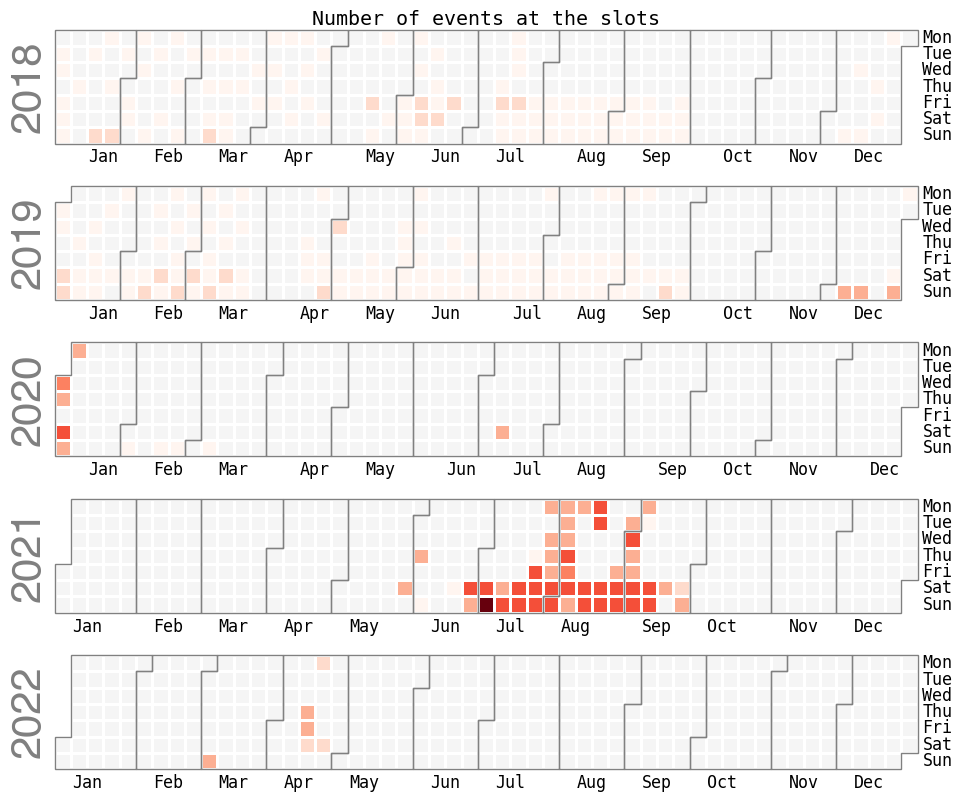

In [110]:
#Set orderdate as index
df.set_index('evstart', inplace = True)
pl1 = calplot.calplot(data = df['event'],how = 'sum', cmap = 'Reds', figsize = (16, 8), suptitle = "Number of events at the slots")

In [111]:
products = set(list(df['evcategory']))
def draw_calplot(prod):
    data_subset = df[df['evcategory'] == prod]
    plt = calplot.calplot(data = data_subset['event'], how = 'sum', figsize = (16,8), suptitle = 'Total '+prod) 

In [112]:
x = interact(draw_calplot, prod = products) 

interactive(children=(Dropdown(description='prod', options=('A22:BrennerLEC_BrennerLec B3 II 110 T1 (km 77-100…